In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:

print('-------------------------------Dataset Shape--------------------------------------')
print(df.shape)
print('-------------------------------Information--------------------------------------')
print(df.info())
print('-------------------------------Description--------------------------------------')
print(df.describe())
print('-------------------------------Null Values--------------------------------------')
print(df.isnull().sum())


-------------------------------Dataset Shape--------------------------------------
(200, 5)
-------------------------------Information--------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None
-------------------------------Description--------------------------------------
       Unnamed: 0          TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.0

* EDA

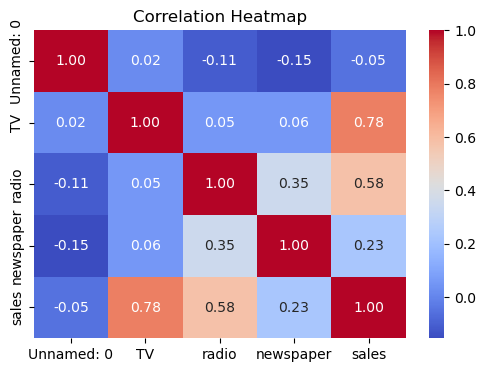

In [8]:

# Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

* Defining Features

In [10]:
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']


* Train Test Split 

In [11]:

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)
print("Train size:", X_train.shape, "Test size:", X_test.shape)


Train size: (160, 3) Test size: (40, 3)


* Implementing MLR

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("Feature names:", X.columns.tolist())

Intercept: 2.9790673381226274
Coefficients: [0.04472952 0.18919505 0.00276111]
Feature names: ['TV', 'radio', 'newspaper']


* Making Prediction

In [13]:
y_pred = model.predict(X_test)

# Compare predictions vs actual
df_pred = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df_pred.head()

,Actual,Predicted
95,16.9,16.408024
15,22.4,20.889882
30,21.4,21.553843
158,7.3,10.608503
128,24.7,22.112373


* Evaluation

In [14]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Squared Error: 3.1740973539761046
Root Mean Squared Error: 1.7815996615334502
R^2 Score: 0.899438024100912


* Residula Analysis

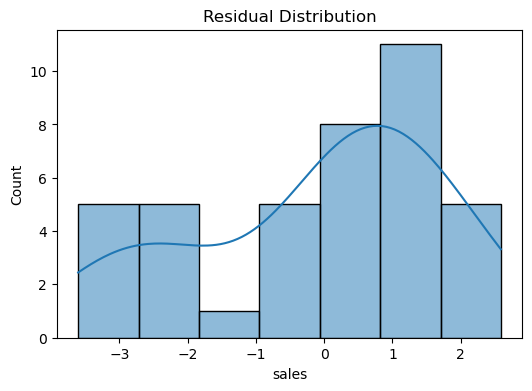

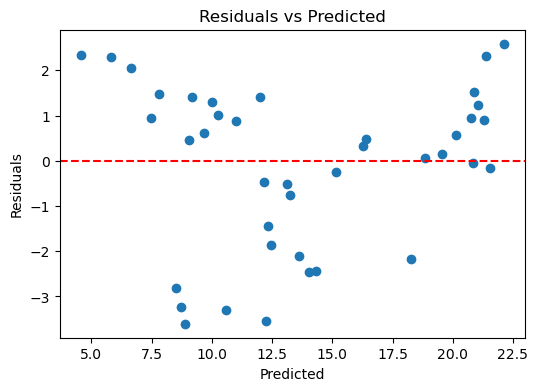

In [15]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

* Actual vs Prediction [ visualization ]


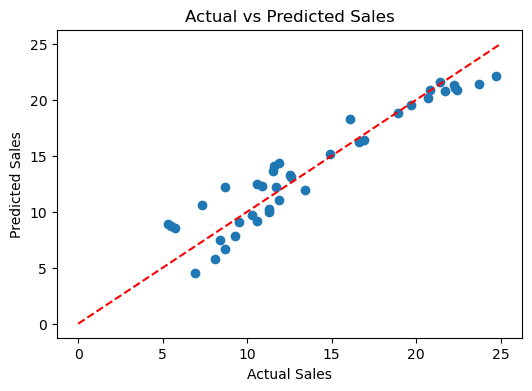

In [16]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.plot([0,25],[0,25],'r--')
plt.show()